In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [3]:
DataMartek = pd.read_csv('/Users/booba/Downloads/Market_Basket_Optimisation.csv')

In [4]:
DataMartek.head(4)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataMartek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [6]:
"""te=TransactionEncoder()
DataMartek_ary=te.fit(DataMartek).transform(DataMartek)    #Apply one-hot-encoding on our dataset
DataFrame=pd.DataFrame(DataMartek_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
print(DataFrame)"""

# Apply one-hot encoding
DataMartek_encoded = pd.get_dummies(DataMartek.stack(), dtype = bool).groupby(level=0).max()

# Display the one-hot encoded DataFrame
DataMartek_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Count the frequency of each item
item_freq = DataMartek_encoded.sum().sort_values(ascending=False)

# Create a bar plot using Plotly
fig = px.bar(x=item_freq.index, y=item_freq.values, labels={'x': 'Items', 'y': 'Frequency'}, title='Item Frequencies')
fig.update_xaxes(tickangle=-45)
fig.show()

In [8]:
# Create a bar plot of the top 10 only
fig = px.bar(x=item_freq.index[:10], y=item_freq.values[:10], labels={'x': 'Items', 'y': 'Frequency'}, title='Item Frequencies')
fig.update_xaxes(tickangle=-45)
fig.show()

In [9]:
from mlxtend.frequent_patterns import apriori
market_basket_frequent_items = apriori(DataMartek_encoded, min_support=0.02, use_colnames = True, verbose = 1, max_len=2)
market_basket_frequent_items['length'] = market_basket_frequent_items['itemsets'].apply(lambda x: len(x))
print(market_basket_frequent_items[market_basket_frequent_items.length==2])

Processing 2756 combinations | Sampling itemset size 2
      support                            itemsets  length
53   0.028800                     (eggs, burgers)       2
54   0.022000             (french fries, burgers)       2
55   0.024400            (mineral water, burgers)       2
56   0.021467                (spaghetti, burgers)       2
57   0.027467               (cake, mineral water)       2
58   0.022800            (chicken, mineral water)       2
59   0.033200                   (eggs, chocolate)       2
60   0.034400           (french fries, chocolate)       2
61   0.022933      (frozen vegetables, chocolate)       2
62   0.023467              (chocolate, green tea)       2
63   0.023067            (chocolate, ground beef)       2
64   0.032133                   (chocolate, milk)       2
65   0.052667          (chocolate, mineral water)       2
66   0.039200              (spaghetti, chocolate)       2
67   0.020133        (cooking oil, mineral water)       2
68   0.036400    

In [10]:
from mlxtend.frequent_patterns import association_rules 
# Show associations with lift more than 1.5 in descending order
market_basket_rules = association_rules(market_basket_frequent_items, metric='lift', min_threshold=1.5)
market_basket_rules.drop_duplicates(['support'], inplace=True)
top_association_rules = market_basket_rules.sort_values(by='lift', ascending=False)
top_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,1.0,0.022088,1.163699,0.682292,0.168096,0.140672,0.312015
28,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,1.0,0.011487,1.268387,0.536127,0.105716,0.211597,0.240292
26,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
8,(frozen vegetables),(milk),0.095333,0.129600,0.023600,0.247552,1.910127,1.0,0.011245,1.156758,0.526685,0.117219,0.135515,0.214826
0,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
34,(tomatoes),(spaghetti),0.068400,0.174133,0.020933,0.306043,1.757520,1.0,0.009023,1.190083,0.462663,0.094465,0.159723,0.213129
24,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
16,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
14,(ground beef),(milk),0.098267,0.129600,0.022000,0.223881,1.727474,1.0,0.009265,1.121477,0.467012,0.106865,0.108319,0.196817
32,(spaghetti),(shrimp),0.174133,0.071333,0.021200,0.121746,1.706717,1.0,0.008778,1.057401,0.501388,0.094530,0.054285,0.209471


In [23]:
from mlxtend.frequent_patterns import apriori
apriori(DataFrame, min_support=0.001)


,support,itemsets
0,0.001600,(0)
1,0.002000,(1)
2,0.001600,(5)
3,0.001200,(9)
4,0.001067,(12)
5,0.001067,(13)
6,0.001333,(14)
7,0.001467,(15)
8,0.001067,(17)
9,0.001333,(18)


In [11]:
# Convert frozenset objects to strings for plotting
top_association_rules['antecedents_str'] = top_association_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_association_rules['consequents_str'] = top_association_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Combine antecedents and consequents for plotting
top_association_rules['items'] = top_association_rules['antecedents_str'] + ' -> ' + top_association_rules['consequents_str']

# Create a bar plot to visualize top association rules
fig = px.bar(top_association_rules, x='items', y='lift',
             labels={'x': 'Item Combination', 'y': 'Lift'},
             title=f'Top {len(top_association_rules)} Most Bought Together Item Combinations')
fig.update_xaxes(tickangle=-45)
fig.show()

/Users/booba/miniconda3/envs/mon_env/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [24]:
# Appliquer apriori et stocker le résultat
frequent_itemsets = apriori(DataFrame, min_support=0.001, use_colnames=True)

# Vérifier si des itemsets ont été trouvés
if frequent_itemsets.empty:
    print("⚠️ Aucun itemset fréquent trouvé ! Essayez de réduire `min_support`.")
else:
    print(frequent_itemsets.head())


    support itemsets
0  0.001600      ( )
1  0.002000      (a)
2  0.001600      (e)
3  0.001200      (i)
4  0.001067      (l)


In [25]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,( ),(a),0.001600,0.002000,0.001200,0.750000,375.000000,1.0,0.001197,3.992000,0.998932,0.500000,0.749499,0.675000
1,(e),( ),0.001600,0.001600,0.001467,0.916667,572.916667,1.0,0.001464,11.980800,0.999854,0.846154,0.916533,0.916667
2,( ),(e),0.001600,0.001600,0.001467,0.916667,572.916667,1.0,0.001464,11.980800,0.999854,0.846154,0.916533,0.916667
3,(t),( ),0.001200,0.001600,0.001200,1.000000,625.000000,1.0,0.001198,inf,0.999600,0.750000,1.000000,0.875000
4,( ),(t),0.001600,0.001200,0.001200,0.750000,625.000000,1.0,0.001198,3.995200,1.000000,0.750000,0.749700,0.875000
5,(o),(a),0.001467,0.002000,0.001067,0.727273,363.636364,1.0,0.001064,3.659333,0.998715,0.444444,0.726726,0.630303
6,(s),(a),0.001333,0.002000,0.001067,0.800000,400.000000,1.0,0.001064,4.990000,0.998832,0.470588,0.799599,0.666667
7,(t),(a),0.001200,0.002000,0.001067,0.888889,444.444444,1.0,0.001064,8.982000,0.998949,0.500000,0.888666,0.711111
8,(t),(e),0.001200,0.001600,0.001067,0.888889,555.555556,1.0,0.001065,8.985600,0.999399,0.615385,0.888711,0.777778
9,"(a, )",(e),0.001200,0.001600,0.001067,0.888889,555.555556,1.0,0.001065,8.985600,0.999399,0.615385,0.888711,0.777778


In [26]:
print(DataFrame.columns)


Index([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='object')


In [27]:
frequent_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) > 0)]


In [31]:
frequent_itemsets = apriori(DataFrame, min_support=0.005, use_colnames=True)


In [29]:
print(DataFrame.sum(axis=1).value_counts())  # Nombre d'articles par transaction


0     7480
6        3
7        3
5        2
12       2
11       2
4        2
9        2
10       2
8        1
13       1
Name: count, dtype: int64


In [32]:
DataFrame_filtered = DataFrame[DataFrame.sum(axis=1) > 0]


In [33]:
print(DataFrame.head(10))
print(DataFrame.sum(axis=1).describe())  # Statistiques des nombres d'articles par transaction


              a      b      c      d      e      f      g      h      i  ...  \
0  False  False  False  False  False  False  False  False   True   True  ...   
1  False   True  False  False   True  False  False  False  False  False  ...   
2  False   True  False   True   True  False  False  False  False  False  ...   
3   True   True   True  False  False   True  False   True  False   True  ...   
4   True   True  False  False  False   True  False   True  False  False  ...   
5   True   True  False  False  False   True   True  False   True  False  ...   
6  False   True  False  False  False  False  False  False  False  False  ...   
7   True   True  False   True  False   True  False   True   True  False  ...   
8   True  False  False  False   True   True  False   True  False   True  ...   
9   True   True  False   True  False   True  False  False  False   True  ...   

       p      r      s      t      u      v      w      x      y      z  
0   True   True   True  False  False  False  

In [34]:
frequent_itemsets = apriori(DataFrame_filtered, min_support=0.0005, use_colnames=True)


In [35]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0         ( )         (a)                0.60                0.75     0.45   
1         (b)         ( )                0.05                0.60     0.05   
2         (e)         ( )                0.60                0.60     0.55   
3         ( )         (e)                0.60                0.60     0.55   
4         (f)         ( )                0.15                0.60     0.15   

   confidence      lift  representativity      leverage  conviction  \
0    0.750000  1.000000               1.0  5.551115e-17         1.0   
1    1.000000  1.666667               1.0  2.000000e-02         inf   
2    0.916667  1.527778               1.0  1.900000e-01         4.8   
3    0.916667  1.527778               1.0  1.900000e-01         4.8   
4    1.000000  1.666667               1.0  6.000000e-02         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0   3.083953e-16  0.500000   0.000000    0.675000  


In [36]:
rules = rules[(rules['antecedents'].apply(len) > 0) & (rules['consequents'].apply(len) > 0)]
print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0         ( )         (a)                0.60                0.75     0.45   
1         (b)         ( )                0.05                0.60     0.05   
2         (e)         ( )                0.60                0.60     0.55   
3         ( )         (e)                0.60                0.60     0.55   
4         (f)         ( )                0.15                0.60     0.15   

   confidence      lift  representativity      leverage  conviction  \
0    0.750000  1.000000               1.0  5.551115e-17         1.0   
1    1.000000  1.666667               1.0  2.000000e-02         inf   
2    0.916667  1.527778               1.0  1.900000e-01         4.8   
3    0.916667  1.527778               1.0  1.900000e-01         4.8   
4    1.000000  1.666667               1.0  6.000000e-02         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0   3.083953e-16  0.500000   0.000000    0.675000  


In [37]:
print(frequent_itemsets.head(10))


   support itemsets
0     0.60      ( )
1     0.75      (a)
2     0.05      (b)
3     0.25      (c)
4     0.25      (d)
5     0.60      (e)
6     0.15      (f)
7     0.30      (g)
8     0.30      (h)
9     0.45      (i)


In [38]:
# Supprimer les itemsets vides
frequent_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) > 0)]

# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0         ( )         (a)                0.60                0.75     0.45   
1         (b)         ( )                0.05                0.60     0.05   
2         (e)         ( )                0.60                0.60     0.55   
3         ( )         (e)                0.60                0.60     0.55   
4         (f)         ( )                0.15                0.60     0.15   

   confidence      lift  representativity      leverage  conviction  \
0    0.750000  1.000000               1.0  5.551115e-17         1.0   
1    1.000000  1.666667               1.0  2.000000e-02         inf   
2    0.916667  1.527778               1.0  1.900000e-01         4.8   
3    0.916667  1.527778               1.0  1.900000e-01         4.8   
4    1.000000  1.666667               1.0  6.000000e-02         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0   3.083953e-16  0.500000   0.000000    0.675000  


In [39]:
# Supprimer les règles où les antécédents ou les conséquents sont vides
rules = rules[(rules['antecedents'].apply(len) > 0) & (rules['consequents'].apply(len) > 0)]

print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0         ( )         (a)                0.60                0.75     0.45   
1         (b)         ( )                0.05                0.60     0.05   
2         (e)         ( )                0.60                0.60     0.55   
3         ( )         (e)                0.60                0.60     0.55   
4         (f)         ( )                0.15                0.60     0.15   

   confidence      lift  representativity      leverage  conviction  \
0    0.750000  1.000000               1.0  5.551115e-17         1.0   
1    1.000000  1.666667               1.0  2.000000e-02         inf   
2    0.916667  1.527778               1.0  1.900000e-01         4.8   
3    0.916667  1.527778               1.0  1.900000e-01         4.8   
4    1.000000  1.666667               1.0  6.000000e-02         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0   3.083953e-16  0.500000   0.000000    0.675000  


In [40]:
# Supprimer les itemsets vides dans frequent_itemsets
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 0]


In [41]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Supprimer les règles avec antécédents ou conséquents vides
rules = rules[(rules['antecedents'].apply(len) > 0) & (rules['consequents'].apply(len) > 0)]

print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0         ( )         (a)                0.60                0.75     0.45   
1         (b)         ( )                0.05                0.60     0.05   
2         (e)         ( )                0.60                0.60     0.55   
3         ( )         (e)                0.60                0.60     0.55   
4         (f)         ( )                0.15                0.60     0.15   

   confidence      lift  representativity      leverage  conviction  \
0    0.750000  1.000000               1.0  5.551115e-17         1.0   
1    1.000000  1.666667               1.0  2.000000e-02         inf   
2    0.916667  1.527778               1.0  1.900000e-01         4.8   
3    0.916667  1.527778               1.0  1.900000e-01         4.8   
4    1.000000  1.666667               1.0  6.000000e-02         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0   3.083953e-16  0.500000   0.000000    0.675000  


In [48]:
# Supprimer les transactions complètement vides
DataFrame = DataFrame.loc[:, DataFrame.sum(axis=0) > 0]

# Supprimer les colonnes avec des noms vides ou contenant uniquement des espaces
DataFrame = DataFrame.loc[:, ~DataFrame.columns.str.fullmatch(r'\s*')]

# Vérifier qu'il ne reste pas de colonnes inutiles
print("Colonnes après nettoyage :", DataFrame.columns)

# Appliquer Apriori en s'assurant que les itemsets ne sont pas vides
frequent_itemsets = apriori(DataFrame, min_support=0.001, use_colnames=True)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 0]

# Générer les règles d'association en filtrant les règles vides
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = rules[(rules['antecedents'].apply(len) > 0) & (rules['consequents'].apply(len) > 0)]

# Affichage des 5 premières règles
print(rules.head())



Colonnes après nettoyage : Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='object')
  antecedents consequents  antecedent support  consequent support   support  \
0         (o)         (a)            0.001467              0.0020  0.001067   
1         (s)         (a)            0.001333              0.0020  0.001067   
2         (t)         (a)            0.001200              0.0020  0.001067   
3         (t)         (e)            0.001200              0.0016  0.001067   

   confidence        lift  representativity  leverage  conviction  \
0    0.727273  363.636364               1.0  0.001064    3.659333   
1    0.800000  400.000000               1.0  0.001064    4.990000   
2    0.888889  444.444444               1.0  0.001064    8.982000   
3    0.888889  555.555556               1.0  0.001065    8.985600   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.998715 

In [49]:
print(rules.sort_values(by="lift", ascending=False).head(10))


  antecedents consequents  antecedent support  consequent support   support  \
3         (t)         (e)            0.001200              0.0016  0.001067   
2         (t)         (a)            0.001200              0.0020  0.001067   
1         (s)         (a)            0.001333              0.0020  0.001067   
0         (o)         (a)            0.001467              0.0020  0.001067   

   confidence        lift  representativity  leverage  conviction  \
3    0.888889  555.555556               1.0  0.001065    8.985600   
2    0.888889  444.444444               1.0  0.001064    8.982000   
1    0.800000  400.000000               1.0  0.001064    4.990000   
0    0.727273  363.636364               1.0  0.001064    3.659333   

   zhangs_metric   jaccard  certainty  kulczynski  
3       0.999399  0.615385   0.888711    0.777778  
2       0.998949  0.500000   0.888666    0.711111  
1       0.998832  0.470588   0.799599    0.666667  
0       0.998715  0.444444   0.726726    0.630303 

In [52]:
rules = rules[rules['confidence'] > 0.85]

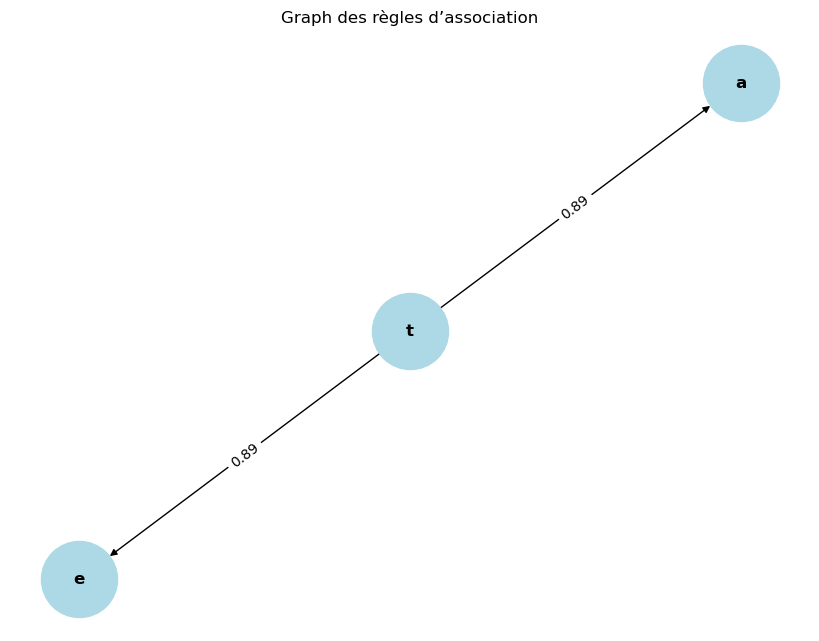

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les arêtes avec leur poids (confiance)
for _, row in rules.iterrows():
    antecedent = list(row['antecedents'])[0]  # Prendre le premier élément de l'ensemble
    consequent = list(row['consequents'])[0]  # Idem
    confidence = row['confidence']
    
    G.add_edge(antecedent, consequent, weight=confidence)

# Dessiner le graphe
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)  # Disposition des nœuds
edges = G.edges(data=True)

# Dessiner les nœuds
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, font_weight="bold")

# Ajouter les poids (confiance) sur les arêtes
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph des règles d’association")
plt.show()


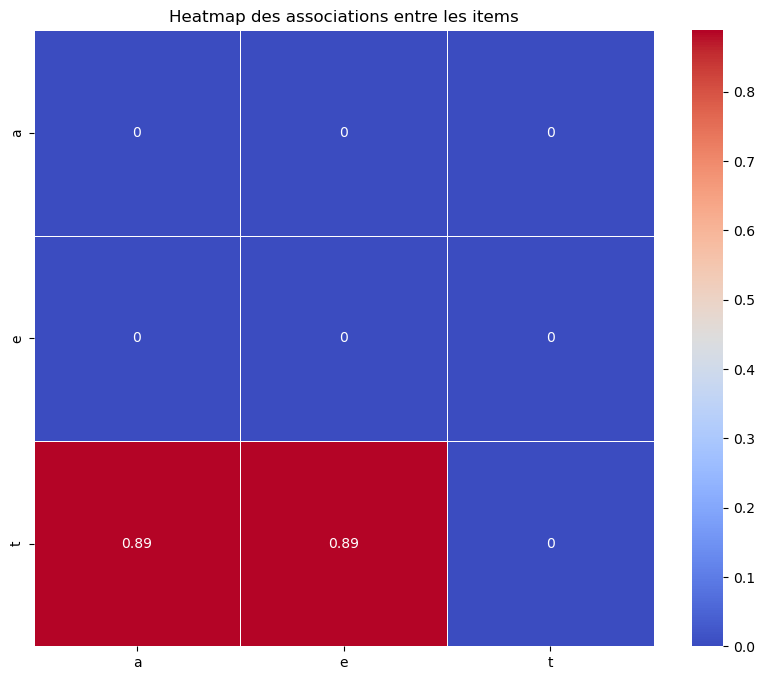

In [57]:
import seaborn as sns
import pandas as pd

all_items = set()
for antecedents, consequents in zip(rules['antecedents'], rules['consequents']):
    all_items.update(antecedents)
    all_items.update(consequents)

all_items = sorted(all_items)  # Trier les éléments pour un affichage plus clair

# Créer une matrice de heatmap à partir des règles
heatmap_data = pd.DataFrame(0.0, index=all_items, columns=all_items)


for _, row in rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    confidence = row['confidence']
    
    heatmap_data.loc[antecedent, consequent] = confidence

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des associations entre les items")
plt.show()


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LogNorm

# Charger les règles d'association (assurez-vous d'avoir un DataFrame nommé 'rules')
heatmap_data = pd.DataFrame(0.0, index=all_items, columns=all_items)


# ✅ 1. Filtrer les règles avec un support > 0.005 et un lift > 3
filtered_rules = rules[(rules['support'] > 0.005) & (rules['lift'] > 3)]

# ✅ 2. Trier par conviction pour voir les règles les plus significatives
sorted_rules = filtered_rules.sort_values('conviction', ascending=False)

# ✅ 3. Diagramme en barres des règles les plus fortes
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_rules['confidence'], y=sorted_rules['antecedents'].astype(str) + ' → ' + sorted_rules['consequents'].astype(str), hue=sorted_rules['lift'], palette='coolwarm')
plt.xlabel("Confiance")
plt.ylabel("Règle")
plt.title("Top règles d'association par confiance et lift")
plt.legend(title="Lift")
plt.show()

# ✅ 4. Graph de réseau amélioré
graph = nx.DiGraph()
for _, row in filtered_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    graph.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
edges = graph.edges(data=True)
nx.draw(graph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges}, font_size=8)
plt.title("Graph des règles d’association avec lift")
plt.show()

# ✅ 5. Heatmap avancée
all_items = list(set(item for row in rules['antecedents'].tolist() + rules['consequents'].tolist() for item in row))
heatmap_data = pd.DataFrame(0.0, index=all_items, columns=all_items)
for _, row in filtered_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    heatmap_data.loc[antecedent, consequent] = row['confidence']

plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', norm=LogNorm())
plt.title("Heatmap avancée des associations entre les items")
plt.show()


ValueError: index cannot be a set